Import libraries

In [1]:
import pandas
import glob
import numpy as np
import pandas as pd

In [2]:
#unitListingsDf.to_pickle('data/unitListings/unitListingsAll.pkl')

In [4]:
unitListingsDf = pd.read_pickle('data/unitListings/unitListingsAll.pkl')
unitListingsDf.shape

(28008, 21)

In [5]:
unitListingsDf.shape

(28008, 21)

Rename all original columns to orig

In [6]:
#df.price.str.replace('$','').str.replace(',','')
unitListingsDf.columns =['orig' + col for col in unitListingsDf.columns]

In [7]:
unitListingsDf.origbaths.unique()

array(['1 bath', '3.5 baths', '2 baths', '3 baths', '2.5 baths',
       '1.5 bath', '-- baths', '5 baths', '0.5 bath', '4.5 baths',
       '7 baths', '4 baths', '5.5 baths', '6.5 baths', '8.5 baths',
       '14 baths', '11 baths', '20 baths', '7.5 baths', '6 baths',
       '10 baths', '15 baths'], dtype=object)

Wow there are apartments with no baths

In [8]:
unitListingsDf.query('origbaths == "-- baths"').head()

,origbaths,origbedrooms,origbuildingDesc,origbuildingName,origcity,origcommuteDistance,origcommuteTimeByBike,origcommuteTimeByCar,origcommuteTimeByFoot,origcommuteTimeByTransit,...,origlongitude,origprice,origpropertyAmenities,origschoolText,origsqFt,origstate,origstreetAddress,origtitle,origunitAmenities,origzipCode
0,-- baths,2 beds,Available June 1st:\n\nJust listedGreat beauti...,None,Manhattan,1.60 miles away,9 minsby bike,16 minsby car,36 minson foot,19 minsby transit,...,-73.988476,"$3,895",[Guarantors],Nearby schools\nStudents who live in this rent...,-- sqft,NY,162 Orchard #3A,NaN,[],10002
1,-- baths,1 bed,No Pets Allowed. One bedroom apt with terrace...,None,Manhattan,1.79 miles away,11 minsby bike,by car,on foot,by transit,...,-73.985209,"$4,125","[Dishwasher, Elevator, Laundry, Terrace]",Nearby schools\nStudents who live in this rent...,-- sqft,NY,90 Clinton Street #6C,NaN,[],10002
0,-- baths,1 bed,tbd,None,Manhattan,1.60 miles away,by bike,by car,on foot,by transit,...,-73.984764,"$2,150",[],Nearby schools\nStudents who live in this rent...,-- sqft,NY,176 Suffolk #3B,NaN,[],10002
0,-- baths,studio,tbd,None,Manhattan,1.64 miles away,by bike,by car,on foot,by transit,...,-73.988739,"$2,495",[],Nearby schools\nStudents who live in this rent...,-- sqft,NY,146 Orchard #4C,NaN,[],10002
0,-- baths,studio,tbd,None,Manhattan,1.53 miles away,by bike,by car,on foot,by transit,...,-73.987919,"$1,995",[],Nearby schools\nStudents who live in this rent...,-- sqft,NY,192 Orchard #5B,NaN,[],10002


New baths column, assume apartment with missing baths have at least one bathroom

In [9]:
unitListingsDf['baths'] = unitListingsDf.origbaths
unitListingsDf.loc[unitListingsDf.origbaths == '-- baths', 'baths'] = '1 baths'

#convert column to float
unitListingsDf.baths = unitListingsDf.baths.str.replace('baths','').str.replace('bath','').str.strip().astype(float)

In [10]:
unitListingsDf.baths.unique()

array([  1. ,   3.5,   2. ,   3. ,   2.5,   1.5,   5. ,   0.5,   4.5,
         7. ,   4. ,   5.5,   6.5,   8.5,  14. ,  11. ,  20. ,   7.5,
         6. ,  10. ,  15. ])

In [11]:
unitListingsDf.loc[unitListingsDf.baths > 9]

,origbaths,origbedrooms,origbuildingDesc,origbuildingName,origcity,origcommuteDistance,origcommuteTimeByBike,origcommuteTimeByCar,origcommuteTimeByFoot,origcommuteTimeByTransit,...,origprice,origpropertyAmenities,origschoolText,origsqFt,origstate,origstreetAddress,origtitle,origunitAmenities,origzipCode,baths
0,14 baths,8 beds,Renovated 26' Wide 6-Story Mansion\nLocated ju...,None,Manhattan,2.11 miles away,by bike,by car,on foot,by transit,...,"$100,000","[Balcony, Deck, Dishwasher, Finished Basement,...",Nearby schools\nStudents who live in this rent...,15k sqft,NY,15 W 68th Street #MANSION,NaN,[],10023,14.0
0,14 baths,8 beds,Renovated 26' Wide 6-Story Mansion\nLocated ju...,None,Manhattan,2.11 miles away,11 minsby bike,17 minsby car,44 minson foot,21 minsby transit,...,"$100,000","[Balcony, Deck, Dishwasher, Finished Basement,...",Nearby schools\nStudents who live in this rent...,15k sqft,NY,15 W 68th Street #MANSION,NaN,[],10023,14.0
0,11 baths,1 bed,"Hello everyone, \n\n You are viewing a wonderf...",None,Manhattan,2.90 miles away,by bike,by car,on foot,by transit,...,"$1,850","[Gas included in rent, Heating included in rent]",Nearby schools\nStudents who live in this rent...,350 sqft,NY,27 W 84th Street #4FW,NaN,[],10024,11.0
0,20 baths,2 beds,Enormous 2 bed 2 bath with two giant king size...,None,Manhattan,4.72 miles away,by bike,by car,on foot,by transit,...,"$2,400","[Nyc Evacuation 5, Pets]",Nearby schools\nStudents who live in this rent...,"1,000 sqft",NY,105 E 122nd Street #2M,NaN,[],10035,20.0
0,10 baths,studio,"Building : High Floor: :Studio,1 Bathroom wit...",None,Brooklyn,9.08 miles away,by bike,by car,on foot,by transit,...,"$1,350",[Laundry],Nearby schools\nStudents who live in this rent...,450 sqft,NY,1925 Ocean Avenue #5B,NaN,[],11230,10.0
0,15 baths,3 beds,"3 bedrooms, 1.5 baths",None,Maspeth,5.01 miles away,by bike,by car,on foot,by transit,...,"$2,200",[MLS Listing ID: 68-04],Nearby schools\nStudents who live in this rent...,-- sqft,NY,68-04 59th Road,NaN,[],11378,15.0


Fix bath outliers

In [12]:
unitListingsDf.loc[unitListingsDf.baths.isin((10,15,20)), 'baths'] = unitListingsDf.loc[unitListingsDf.baths.isin((10,15,20)), 'baths'] / 10

In [13]:
unitListingsDf.loc[unitListingsDf.origstreetAddress == '27 W 84th Street #4FW', 'baths'] = 1.0

In [14]:
unitListingsDf.baths.unique()

array([  1. ,   3.5,   2. ,   3. ,   2.5,   1.5,   5. ,   0.5,   4.5,
         7. ,   4. ,   5.5,   6.5,   8.5,  14. ,   7.5,   6. ])

Create bedrooms column

In [15]:
unitListingsDf.origbedrooms.unique()

array(['studio', '5 beds', '1 bed', '3 beds', '2 beds', '4 beds', '6 beds',
       '7 beds', '8 beds', '11 beds', '9 beds'], dtype=object)

In [16]:
unitListingsDf['bedrooms'] = (unitListingsDf.origbedrooms
                               .str.replace('studio','0')
                               .str.replace('beds','')
                               .str.replace('bed','')
                               .str.strip()
                               .astype(int)
                              )

In [17]:
unitListingsDf.bedrooms.unique()

array([ 0,  5,  1,  3,  2,  4,  6,  7,  8, 11,  9])

126 apartments with only minimum price listing

In [18]:
unitListingsDf[unitListingsDf.origprice.str.contains('+',regex=False)][['origstreetAddress','bedrooms','origprice']]

,origstreetAddress,bedrooms,origprice
0,777 6th Avenue,0,"$3,670+"
0,105 W 29th Street,0,"$3,815+"
1,105 W 29th Street,0,"$3,865+"
2,105 W 29th Street,0,"$3,975+"
3,105 W 29th Street,0,"$4,295+"
0,800 6th Avenue,0,"$3,515+"
1,800 6th Avenue,0,"$3,525+"
2,800 6th Avenue,0,"$3,583+"
3,800 6th Avenue,0,"$4,070+"
1,525 W 28th Street,0,"$3,230+"


For now exclude these apartments

In [19]:
unitListingsDf = unitListingsDf.loc[-unitListingsDf.origprice.str.contains('+',regex=False)]

Apartments with no price, exclude these as well

In [20]:
unitListingsDf = unitListingsDf.loc[-unitListingsDf.origprice.str.contains('--',regex=False)]

Exclude where price is Call

In [22]:
unitListingsDf = unitListingsDf.loc[-unitListingsDf.origprice.str.contains('Call',regex=False)]

Convert to float and put it in new price column, convert 'k' to 1000s

In [23]:
unitListingsDf.loc[unitListingsDf.origprice.str.contains('k',regex=False),'origprice'] = (unitListingsDf.loc[unitListingsDf.origprice.str.contains('k',regex=False),'origprice']
 .str.replace('k','')
 .str.replace('$','')
 .str.strip()
 .astype(float)
) * 1000

In [24]:
unitListingsDf['price'] = (unitListingsDf.origprice
                           .str.replace('$','')
                           .str.replace(',','')
                           .str.strip()
                           .astype(float)
                          )

In [25]:
unitListingsDf.origzipCode.unique()

array(['10001', '12602', '10018', '12603', '10011', '10010', '10016',
       '10003', '10002', '10012', '10003-4182', '10013', '10009', '12601',
       '10004', '10005', '10006', '10007-3601', '10007', '10282', '11229',
       '10704', '10011-3649', '10011-6733', '10023', '10011-1120', '11223',
       '10356', '10000', '10014', '10029', '10036', '12605', '00000',
       '11016', '10017', '10022', '10019', '10019-3510', '10069', '10021',
       '10065', '11753', '10028', '10075', '10024', '11024', '10025',
       '10026', '10128', '10025-6999', '10027', '10037', '10035',
       '10028-5606', '10675', '10030', '10031', '07030', '10032', '11032',
       '10033', '10453', '10457', '10034', '10040', '11034', '11204',
       '10038', '10039', '10044', '10128-3803', '11236', '10280', '10304',
       '10301', '10302', '10303', '10306', '10305', '10308', '10307',
       '10309', '10312', '10310', '10314', '10451', '10455', '10452',
       '10472', '10458', '10468', '10454', '10456', '10479', '1

Fix zip codes

In [26]:
unitListingsDf['zipCode'] = unitListingsDf.origzipCode.str.strip()
unitListingsDf.loc[unitListingsDf.origzipCode.str.contains('-',regex=False),'zipCode'] = unitListingsDf.loc[unitListingsDf.origzipCode.str.contains('-',regex=False),'origzipCode'].str.slice(0,5)

In [27]:
unitListingsDf.zipCode.unique()

array(['10001', '12602', '10018', '12603', '10011', '10010', '10016',
       '10003', '10002', '10012', '10013', '10009', '12601', '10004',
       '10005', '10006', '10007', '10282', '11229', '10704', '10023',
       '11223', '10356', '10000', '10014', '10029', '10036', '12605',
       '00000', '11016', '10017', '10022', '10019', '10069', '10021',
       '10065', '11753', '10028', '10075', '10024', '11024', '10025',
       '10026', '10128', '10027', '10037', '10035', '10675', '10030',
       '10031', '07030', '10032', '11032', '10033', '10453', '10457',
       '10034', '10040', '11034', '11204', '10038', '10039', '10044',
       '11236', '10280', '10304', '10301', '10302', '10303', '10306',
       '10305', '10308', '10307', '10309', '10312', '10310', '10314',
       '10451', '10455', '10452', '10472', '10458', '10468', '10454',
       '10456', '10479', '10459', '10460', '10462', '10461', '11111',
       '10467', 'null', '10463', '10469', '10464', '10465', '10466',
       '10470', '1047

In [28]:
unitListingsDf.origcity.unique()

array(['New York', 'Manhattan', 'New York City', 'New Rochelle', 'Astoria',
       'Nyc', 'York', 'Call Listing Agent', 'Bronx', 'New York Ny',
       'Staten Island', 'Staten Isl', 'Staten Island Ny', 'Mamaroneck',
       'Fordham Bronx', 'The Bronx', 'Parkchester', 'Riverdale', 'Jerome',
       'Floral Park', 'Glen Oaks', 'Glen Oaks Village', 'Long Island City',
       'Queens', 'Astoris', 'Sunnyside', 'Jackson Heights', 'Brooklyn',
       'Canarsie', 'Bensonhurst', 'Fort Greene', 'Broklyn', 'Jamaica',
       'Brownsville', 'Crown Heights Brooklyn', 'Brookyln', 'Brookyn',
       'Brooklyn Ny', 'Sea Gate', 'New Yorl', 'B', 'Broooklyn',
       'Mill Basin', 'Na', 'Ridgewood', 'Flushing', 'College Point',
       'Whitestone', 'Woodside', 'College Pt', 'College', 'Beechurst',
       'Beechhurst', 'Fresh Meadows', '30ave', 'Bayside', 'Bay Terrace',
       'Elmhurst', 'Little Neck', 'Douglaston', 'Bellerose',
       'Oakland Gardens', 'Kew Gardens', 'Kew Gardens Hills',
       'Kew Garden 

In [29]:
unitListingsDf.loc[unitListingsDf.origcity=='Nyc']

,origbaths,origbedrooms,origbuildingDesc,origbuildingName,origcity,origcommuteDistance,origcommuteTimeByBike,origcommuteTimeByCar,origcommuteTimeByFoot,origcommuteTimeByTransit,...,origsqFt,origstate,origstreetAddress,origtitle,origunitAmenities,origzipCode,baths,bedrooms,price,zipCode
0,1 bath,studio,"High Ceilings, Very Sunny Natural Wood Floors,...",None,Nyc,1.29 miles away,by bike,by car,on foot,by transit,...,-- sqft,NY,E 53,NaN,[],10022,1.0,0,2200.0,10022


In [30]:
unitListingsDf.loc[unitListingsDf.origstreetAddress.str.len() < 5][['origstreetAddress','origlatitude','origlongitude']]

,origstreetAddress,origlatitude,origlongitude
0,W 26,40.745849,-73.994815
0,W 26,40.747202,-73.997620
0,W 30,40.749778,-73.996127
1,W 30,40.749778,-73.996127
1,E 18,40.734058,-73.981801
2,E 11,40.727825,-73.980883
0,E 11,40.726839,-73.978541
0,E 22,40.740080,-73.988747
1,E 22,40.740080,-73.988747
2,E 22,40.740080,-73.988747


Create commute distance column

In [31]:
unitListingsDf['commuteDistance'] = unitListingsDf.origcommuteDistance.str.replace(' miles away','').str.strip().astype(float)

In [126]:
unitListingsDf.shape

(27829, 27)

Square Footage is missing for more than half of the listings

In [127]:
unitListingsDf.loc[unitListingsDf.origsqFt == "-- sqft",].shape

(18246, 27)

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

(750, 12000)

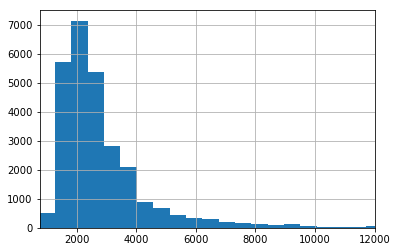

In [33]:
ax = unitListingsDf.price.hist(bins=200)
#ax.set_xscale('log')
ax.set_xlim([750,12000])

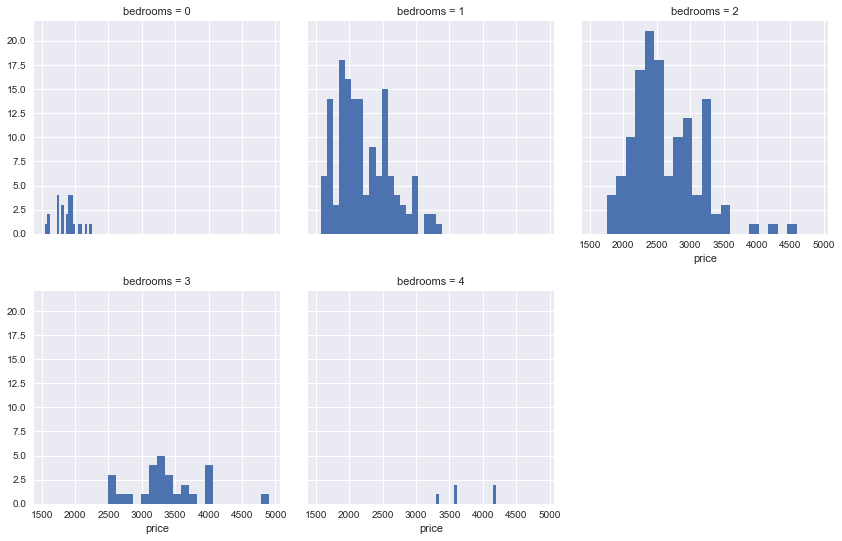

In [34]:
import seaborn as sns
astoriaDf = unitListingsDf[unitListingsDf.zipCode == '11102']
#astoriaDf['str_bedrooms'] = astoriaDf.bedrooms.apply(str)
#ax.set_xscale('log')
#ax.set_xlim([750,12000])



g = sns.FacetGrid(data=astoriaDf, col='bedrooms', col_wrap=3)
g = g.map(plt.hist, 'price', bins = 20)
g.fig.set_size_inches((12,8))

In [210]:
unitListingsDf['log_price'] = np.log(unitListingsDf.price)
unitListingsDf['log_bedrooms'] = np.log(unitListingsDf.bedrooms)
unitListingsDf['log_baths'] = np.log(unitListingsDf.baths)

/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [214]:
unitListingsDf.log_baths.unique()

array([ 0.        ,  1.25276297,  0.69314718,  1.09861229,  0.91629073,
        0.40546511,  1.60943791, -0.69314718,  1.5040774 ,  1.94591015,
        1.38629436,  1.70474809,  1.87180218,  2.14006616,  2.63905733,
        2.01490302,  1.79175947])

In [36]:
unitListingsDf.origcity.unique()

array(['New York', 'Manhattan', 'New York City', 'New Rochelle', 'Astoria',
       'Nyc', 'York', 'Call Listing Agent', 'Bronx', 'New York Ny',
       'Staten Island', 'Staten Isl', 'Staten Island Ny', 'Mamaroneck',
       'Fordham Bronx', 'The Bronx', 'Parkchester', 'Riverdale', 'Jerome',
       'Floral Park', 'Glen Oaks', 'Glen Oaks Village', 'Long Island City',
       'Queens', 'Astoris', 'Sunnyside', 'Jackson Heights', 'Brooklyn',
       'Canarsie', 'Bensonhurst', 'Fort Greene', 'Broklyn', 'Jamaica',
       'Brownsville', 'Crown Heights Brooklyn', 'Brookyln', 'Brookyn',
       'Brooklyn Ny', 'Sea Gate', 'New Yorl', 'B', 'Broooklyn',
       'Mill Basin', 'Na', 'Ridgewood', 'Flushing', 'College Point',
       'Whitestone', 'Woodside', 'College Pt', 'College', 'Beechurst',
       'Beechhurst', 'Fresh Meadows', '30ave', 'Bayside', 'Bay Terrace',
       'Elmhurst', 'Little Neck', 'Douglaston', 'Bellerose',
       'Oakland Gardens', 'Kew Gardens', 'Kew Gardens Hills',
       'Kew Garden 

In [37]:
unitListingsDf.dtypes

origbaths                    object
origbedrooms                 object
origbuildingDesc             object
origbuildingName             object
origcity                     object
origcommuteDistance          object
origcommuteTimeByBike        object
origcommuteTimeByCar         object
origcommuteTimeByFoot        object
origcommuteTimeByTransit     object
origlatitude                float64
origlongitude               float64
origprice                    object
origpropertyAmenities        object
origschoolText               object
origsqFt                     object
origstate                    object
origstreetAddress            object
origtitle                    object
origunitAmenities            object
origzipCode                  object
baths                       float64
bedrooms                      int64
price                       float64
zipCode                      object
commuteDistance             float64
log_price                   float64
dtype: object

In [159]:
propAmenityCounts = (unitListingsDf.origpropertyAmenities
 .apply(lambda x: pd.Series(x)).unstack()
 .value_counts().reset_index())

In [165]:
propAmenityCounts.columns = ['amenity', 'cnt']
topPropAmenities = propAmenityCounts.loc[-propAmenityCounts.amenity.str.contains('MLS',regex=False)].head(30).amenity.tolist()

In [166]:
topPropAmenities

['Elevator',
 'Pets',
 'Dishwasher',
 'Laundry',
 'Live In Super',
 'Dogs Allowed',
 'Door Attendant',
 'Guarantor Ok',
 'Fitness Center',
 'Fios Available',
 'Heating included in rent',
 'Cats Allowed',
 'Roofdeck',
 'Washer Dryer',
 'Storage Room',
 'Full Time Doorman',
 'Bike Room',
 'Guarantors',
 'Hot water included in rent',
 'Concierge',
 'Parking',
 'Floor Covering: Hardwood',
 'Garage',
 'Deck',
 'Central Ac',
 'Garden',
 'Pool',
 'Small Dogs Allowed',
 'Storage Space',
 'Balcony']

In [216]:
unitListingsDf.commuteDistance

0     1.14 miles away
1     1.14 miles away
2     1.14 miles away
3     1.14 miles away
0     0.32 miles away
1     0.32 miles away
2     0.32 miles away
3     0.32 miles away
0     0.64 miles away
0     0.51 miles away
1     0.51 miles away
2     0.51 miles away
3     0.51 miles away
4     0.51 miles away
5     0.51 miles away
6     0.51 miles away
7     0.51 miles away
0     1.09 miles away
1     1.09 miles away
2     1.09 miles away
3     1.09 miles away
0     0.62 miles away
1     0.62 miles away
2     0.62 miles away
3     0.62 miles away
4     0.62 miles away
0     0.21 miles away
1     0.21 miles away
2     0.21 miles away
3     0.21 miles away
           ...       
0    13.81 miles away
0    13.85 miles away
0    13.59 miles away
0    14.10 miles away
0    13.27 miles away
0    13.86 miles away
0    13.86 miles away
1    13.86 miles away
2    13.86 miles away
3    13.86 miles away
4    13.86 miles away
0    13.73 miles away
0    13.41 miles away
0    14.01 miles away
0    13.42

In [196]:
#unitListingsDf.origpropertyAmenities.apply(lambda x: [i for i in x if i in topPropAmenities])
#lambda x: [i for i in x if i in topPropAmenities]

t = pd.concat([unitListingsDf, pd.DataFrame(columns=topPropAmenities)])
t[topPropAmenities] = 0

def propAmenityTransform(x):
    for col in set(x.origpropertyAmenities + x.origpropertyAmenities):
        if col in topPropAmenities:
            x[col] = 1
    return(x)

t = t.apply(lambda x: propAmenityTransform(x), axis=1)

In [197]:
t

,Balcony,Bike Room,Cats Allowed,Central Ac,Concierge,Deck,Dishwasher,Dogs Allowed,Door Attendant,Elevator,...,origpropertyAmenities,origschoolText,origsqFt,origstate,origstreetAddress,origtitle,origunitAmenities,origzipCode,price,zipCode
0,0,0,0,0,0,0,0,0,0,0,...,[],Nearby schools\nStudents who live in this rent...,524 sqft,NY,282 11th Avenue,S8\nCheck availability,[],10001,3005.0,10001
1,0,0,0,0,0,0,0,0,0,0,...,[],Nearby schools\nStudents who live in this rent...,524 sqft,NY,282 11th Avenue,S4\nCheck availability,[],10001,3095.0,10001
2,0,0,0,0,0,0,0,0,0,0,...,[],Nearby schools\nStudents who live in this rent...,524 sqft,NY,282 11th Avenue,S5\nCheck availability,[],10001,3180.0,10001
3,0,0,0,0,0,0,0,0,0,0,...,[],Nearby schools\nStudents who live in this rent...,524 sqft,NY,282 11th Avenue,S10\nCheck availability,[],10001,3245.0,10001
0,0,0,0,0,0,1,1,0,0,0,...,"[Deck, Dishwasher, Fireplace, Hot Tub, Laundry...",Nearby schools\nStudents who live in this rent...,"4,068 sqft",NY,280 W 25th Street #TH,NaN,[],10001,19500.0,10001
0,0,0,1,0,0,0,0,1,0,0,...,"[Cats Allowed, Dogs Allowed, Parking Type: Gar...",Nearby schools\nStudents who live in this rent...,-- sqft,NY,W 26,NaN,"[Air Conditioning, Hardwood Floors]",12602,4250.0,12602
1,0,0,0,0,1,0,0,0,1,1,...,"[Concierge, Door Attendant, Elevator, Fitness ...",Nearby schools\nStudents who live in this rent...,-- sqft,NY,200 W 26th Street #12C,NaN,[],10001,4000.0,10001
2,0,0,0,0,1,1,0,0,1,1,...,"[Concierge, Deck, Door Attendant, Elevator, Fi...",Nearby schools\nStudents who live in this rent...,-- sqft,NY,200 W 26th Street #15E,NaN,[],10001,5850.0,10001
3,0,0,0,0,1,1,0,0,1,1,...,"[Concierge, Deck, Door Attendant, Elevator, Fi...",Nearby schools\nStudents who live in this rent...,-- sqft,NY,200 W 26th Street #17F,NaN,[],10001,4250.0,10001
4,0,0,0,0,1,0,1,0,1,1,...,"[Concierge, Dishwasher, Door Attendant, Elevat...",Nearby schools\nStudents who live in this rent...,-- sqft,NY,200 W 26th Street #17J,NaN,[],10001,4225.0,10001


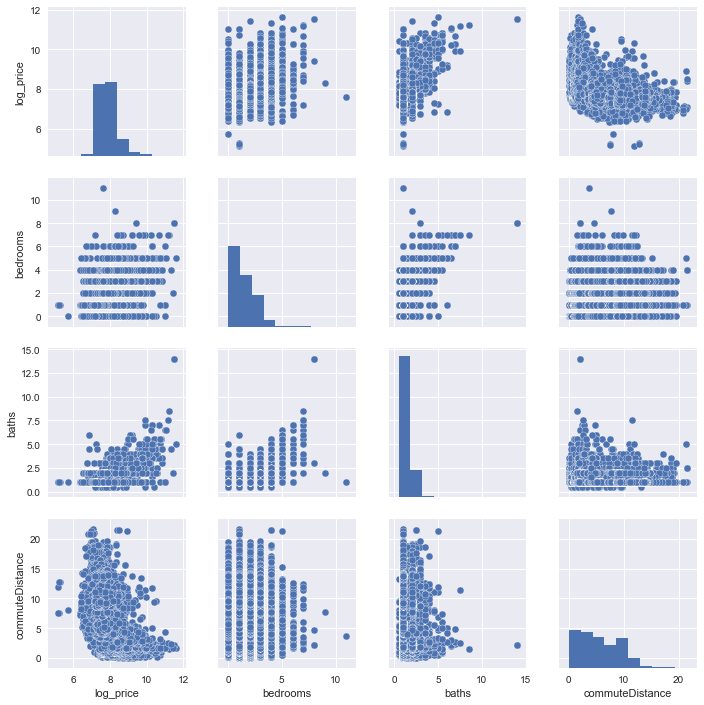

In [213]:
sns.pairplot(unitListingsDf[['log_price','bedrooms','baths', 'commuteDistance']].dropna())

In [43]:
pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv')

,Division,Line,Station_Name,Station_Latitude,Station_Longitude,Route_1,Route_2,Route_3,Route_4,Route_5,...,Staffing,Staff_Hours,ADA,ADA_Notes,Free_Crossover,North_South_Street,East_West_Street,Corner,Latitude,Longitude
0,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.775149,-73.912074
1,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.774810,-73.912151
2,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NE,40.775025,-73.911891
3,BMT,Astoria,Ditmars Blvd,40.775036,-73.912034,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,23rd Ave,NW,40.774938,-73.912337
4,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SW,40.770313,-73.917978
5,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave South,SE,40.770170,-73.917755
6,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave North,NW,40.771009,-73.917167
7,BMT,Astoria,Astoria Blvd-Hoyt Av,40.770258,-73.917843,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,Hoyt Ave North,NE,40.770870,-73.916935
8,BMT,Astoria,30 Av-Grand Av,40.766779,-73.921479,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,30th Ave,SW,40.766787,-73.921629
9,BMT,Astoria,30 Av-Grand Av,40.766779,-73.921479,N,Q,NaN,NaN,NaN,...,FULL,NaN,False,NaN,True,31st St,30th Ave,SE,40.766700,-73.921406


In [44]:
unitListingsDf.bedrooms.value_counts()

1     9698
2     8389
3     5125
0     3414
4      999
5      143
6       41
7       15
8        3
11       1
9        1
Name: bedrooms, dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import patsy
from sklearn.model_selection import cross_val_score

In [208]:
#t[[x for x in t.columns x]
colsToKeep = [x for x in t.columns if not 'orig'in x]
colsToKeep

['Balcony',
 'Bike Room',
 'Cats Allowed',
 'Central Ac',
 'Concierge',
 'Deck',
 'Dishwasher',
 'Dogs Allowed',
 'Door Attendant',
 'Elevator',
 'Fios Available',
 'Fitness Center',
 'Floor Covering: Hardwood',
 'Full Time Doorman',
 'Garage',
 'Garden',
 'Guarantor Ok',
 'Guarantors',
 'Heating included in rent',
 'Hot water included in rent',
 'Laundry',
 'Live In Super',
 'Parking',
 'Pets',
 'Pool',
 'Roofdeck',
 'Small Dogs Allowed',
 'Storage Room',
 'Storage Space',
 'Washer Dryer',
 'baths',
 'bedrooms',
 'commuteDistance',
 'log_price',
 'price',
 'zipCode']

In [209]:
dataset = (unitListingsDf.reset_index()[colsToKeep]
           .dropna().sort_values('log_price', ascending=False)
          )
numericalData = dataset[['log_price', 'bedrooms', 'baths','origlatitude', 'origlongitude','commuteDistance']]
# cols = X.columns
# X = scale(X)
# X = pd.DataFrame(X)
# X.columns = cols
# y = dataset[['log_price']]

# cols = numericalData.columns

# numericalData = pd.DataFrame(scale(numericalData))
# numericalData.columns = cols


KeyError: "['Balcony' 'Bike Room' 'Cats Allowed' 'Central Ac' 'Concierge' 'Deck'\n 'Dishwasher' 'Dogs Allowed' 'Door Attendant' 'Elevator' 'Fios Available'\n 'Fitness Center' 'Floor Covering: Hardwood' 'Full Time Doorman' 'Garage'\n 'Garden' 'Guarantor Ok' 'Guarantors' 'Heating included in rent'\n 'Hot water included in rent' 'Laundry' 'Live In Super' 'Parking' 'Pets'\n 'Pool' 'Roofdeck' 'Small Dogs Allowed' 'Storage Room' 'Storage Space'\n 'Washer Dryer'] not in index"

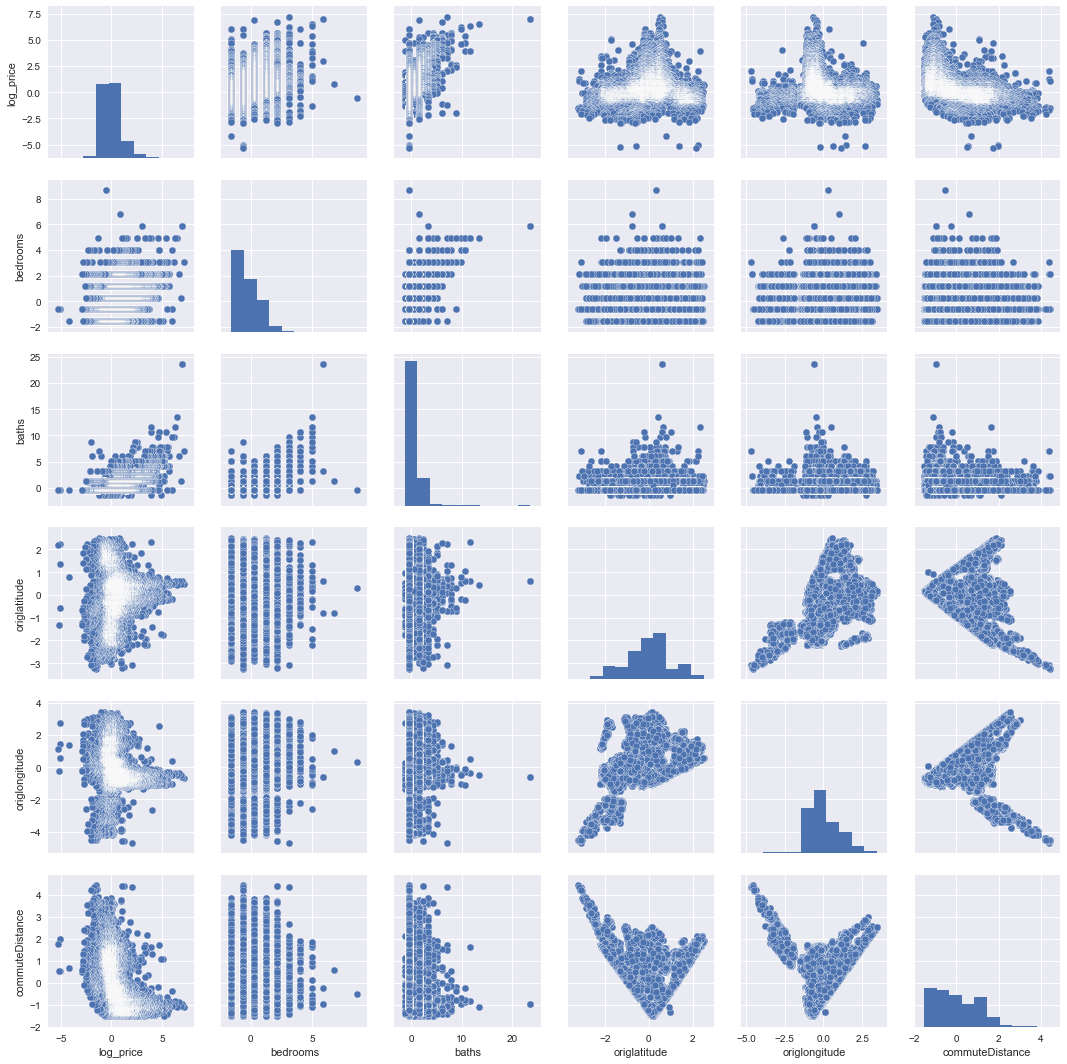

In [86]:
#np_scaled = scale(X)
#dataset_normalized = pd.DataFrame(X)
#dataset_normalized.columns = X.columns
sns.pairplot(numericalData)

In [87]:
zipCodeOneHotDf = patsy.dmatrix('zipCode',data=dataset, return_type='dataframe')

In [112]:
dataset = numericalData.join(zipCodeOneHotDf)
X = dataset.iloc[:,1:-1]
y = dataset['log_price']

In [113]:
#dataset.corr()

(263,)

In [115]:
lr = LinearRegression()

scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(scores)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [120]:
import statsmodels.api as sm

lsm = sm.OLS(y,X)
fit4 = lsm.fit()
fit4.summary()

ValueError: On entry to DLASCL parameter number 5 had an illegal value

In [94]:
import statsmodels.formula.api as smf

In [97]:
'+ '.join(dataset.columns)

'log_price+ bedrooms+ baths+ origlatitude+ origlongitude+ commuteDistance+ Intercept+ zipCode[T.06830]+ zipCode[T.07001]+ zipCode[T.07002]+ zipCode[T.07003]+ zipCode[T.07004]+ zipCode[T.07005]+ zipCode[T.07030]+ zipCode[T.07087]+ zipCode[T.07101]+ zipCode[T.10000]+ zipCode[T.10001]+ zipCode[T.10002]+ zipCode[T.10003]+ zipCode[T.10004]+ zipCode[T.10005]+ zipCode[T.10006]+ zipCode[T.10007]+ zipCode[T.10009]+ zipCode[T.10010]+ zipCode[T.10011]+ zipCode[T.10012]+ zipCode[T.10013]+ zipCode[T.10014]+ zipCode[T.10016]+ zipCode[T.10017]+ zipCode[T.10018]+ zipCode[T.10019]+ zipCode[T.10021]+ zipCode[T.10022]+ zipCode[T.10023]+ zipCode[T.10024]+ zipCode[T.10025]+ zipCode[T.10026]+ zipCode[T.10027]+ zipCode[T.10028]+ zipCode[T.10029]+ zipCode[T.10030]+ zipCode[T.10031]+ zipCode[T.10032]+ zipCode[T.10033]+ zipCode[T.10034]+ zipCode[T.10035]+ zipCode[T.10036]+ zipCode[T.10037]+ zipCode[T.10038]+ zipCode[T.10039]+ zipCode[T.10040]+ zipCode[T.10044]+ zipCode[T.10065]+ zipCode[T.10069]+ zipCode[T.1007

In [ ]:

# Define the model
lm1 = smf.ols('log_price ~ bedrooms + baths + origlatitude + origlongitude + commuteDistance', 
              data=dataset_normalized)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

In [ ]:
fit1.resid.plot(style='o', figsize=(12,8))

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing

In [ ]:
rcv = RidgeCV(cv=5)

dataset_normarlized = preprocessing.normalize(dataset)
y = dataset_normalized['log_price']
X = dataset_normalized.loc[:,~dataset_normalized.columns.isin(['log_price'])]

rcv.fit(X, y)
rcv.score(X, y)

In [ ]:

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [ ]:
#est = make_pipeline(PolynomialFeatures(3), ElasticNet(alpha=3, max_iter=10000))
est = ElasticNetCV(cv=10)

In [ ]:
est.fit(X,y)

In [ ]:
est.score(X,y)